## **Linear Regression and Logistics Regression**

In this lab, we will try to unpack the process of Linear Regression and Logistics Regression and try to build a simple model by yourself.

In [10]:
# import the library
import numpy as np
import matplotlib.pyplot as plt

### **Main steps in Linear Regression**

1. Initialize the linear euqation
2. Fit the data to get the results
3. Compute the loss between the true values
4. Update the parameters

In [17]:
# set random seed to get the same result every time
np.random.seed(0)

# Generate random data
X = np.array([i for i in range(1,101)])   # Array of 100 values
res = 3 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res

# Normalize the data
X = (X - np.mean(X)) / np.std(X)

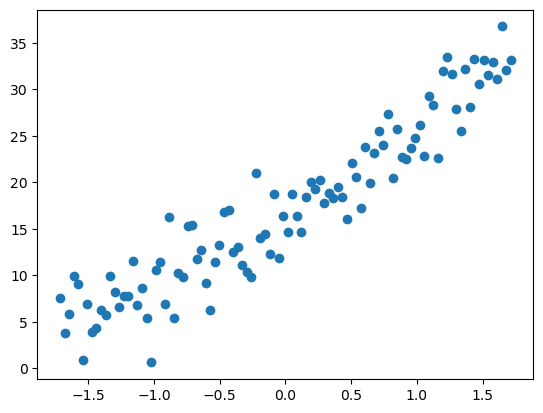

In [18]:
# Visualize the data
plt.scatter(X, y)
plt.show()

### **Step1: Initialize the Linear Equation**
Since the data we use in this lab has only 1 feature. In this step we will initialize the values of w and b in the equation

$$
y = w1x1 + w2x2 + b
$$

We will need to provide the values of w and b. We will start with $w$ = 0 and $b$ = 0.

In [33]:
# Initialize the equation with 0 values for slope and intercept
w = 0
b = 0

### **Step2: Fit the data to get the results**
Since we already have our linear equation, we can fit the data into the model to get the results.

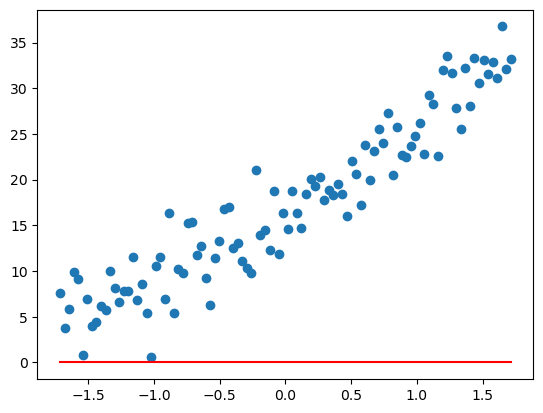

In [20]:
# Fit the data to the model
y_pred = w * X + b

# Visualize the results
plt.plot(X, y_pred, color='red')
plt.scatter(X, y)
plt.show()

### **Step3: Compute the loss between the predicted and actual values**
It seems that the model is very far from the actual data. We need to adjust the slope and intercept to fit the data. We can use the Mean Squared Error (MSE) to measure the performance of the model. The MSE is calculated as follows:
$$
MSE = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

In [24]:
def MSE(y, y_pred):
    n = len(y)
    return np.sum((y - y_pred)**2) / (2 * n)

# Calculate the mean squared error
print(MSE(y, y_pred))

189.96968768050425


### **Step4: Update the parameters**
The loss value is very large, which means the performance of the model very bad. We need to update our parameters to better fit the data. In this lab, we use gradient descent to update our parameters.

If you are not familiar with Gradient Descent, you can directly run the code below. We will introduce Gradient Descent in the following tutorials.

For $w$：

$$
\frac{\partial Loss}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} -x_i(y_i - (wx_i + b))
$$
$$
w = w - \alpha \frac{\partial Loss}{\partial w}
$$

For $b$：

$$
\frac{\partial Loss}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} -(y_i - (wx_i + b))
$$
$$
b = b - \alpha \frac{\partial Loss}{\partial b}
$$

In [27]:
def gradient_descent(X, y, w, b, learning_rate):
    n = len(y)
    y_pred = w * X + b
    dW = (1 / n) * sum(-X * (y - y_pred))
    db = (1 / n) * sum(-(y - y_pred))
    w = w - learning_rate * dW
    b = b - learning_rate * db
    return w, b

# Update w and b
w, b = gradient_descent(X, y, w, b, 0.01)
print(w, b)

0.9155717107721669 1.8889072210797768


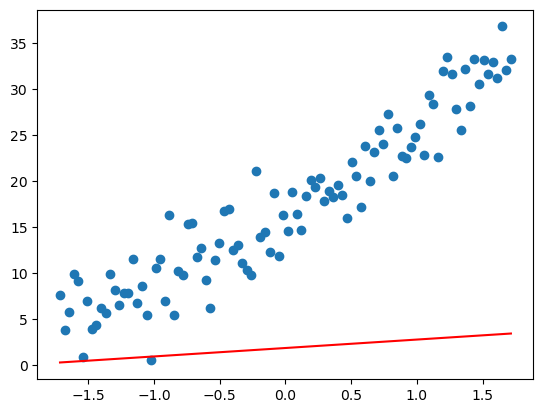

In [28]:
y_pred = w * X + b
plt.plot(X, y_pred, color='red')
plt.scatter(X, y)
plt.show()

There are two ways to terminate the algorithm:
1. Run specific number of iterations, like 10,000 or 100,000
2. Run the algorithm until the loss function less than a small threshold.

In [37]:
# Run the gradient descent algorithm in n iterations
def method1(X, y, w, b, learning_rate, iterations):
    for i in range(iterations):
        w, b = gradient_descent(X, y, w, b, learning_rate)
    return w, b

# Run the gradient descent algorithm until the loss is less than a certain value
def method2(X, y, w, b, learning_rate, epsilon=5):
    while True:
        w, b = gradient_descent(X, y, w, b, learning_rate)
        y_pred = w * X + b
        loss = MSE(y, y_pred)
        if loss < epsilon:
            break
    
    return w, b


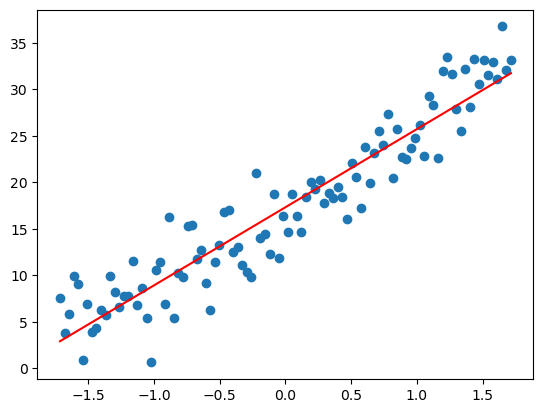

4.537398840608756


In [31]:
# Fit the model with method1
w, b = method1(X, y, w, b, 0.01, 1000)

# # Make predictions
y_pred = w * X + b

# Visualize the results
plt.plot(X, y_pred, color='red')
plt.scatter(X, y)
plt.show()

print(MSE(y, y_pred))

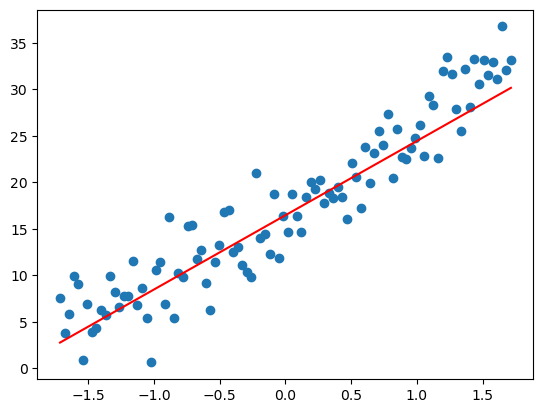

4.992420142076997


In [38]:
w, b = 0, 0
# Fit the model with method2
w, b = method2(X, y, w, b, 0.01)

# Make predictions
y_pred = w * X + b

# Visualize the results
plt.plot(X, y_pred, color='red')
plt.scatter(X, y)
plt.show()

print(MSE(y, y_pred))

### **Which one is better?**

It seems that these 2 methods produce a similar result. 

If we set a much smaller threshold, like $10^{-6}$, method2 will take much longer time to converge with CPU. However, in practice we often use method2 since we don't know excatly how many steps we need to take to converge the model.

### **Logistics Regression**
The logistic regression model is a binary classification model that is used when the dependent variable is categorical.

Different from Linear Regression, Logistics Regression has:
1. Additive Sigmoid Function
2. Different Loss Function

In [57]:
# Generate 100 data from sklearn datasets, each data has 2 features with label 0 or 1
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=51)

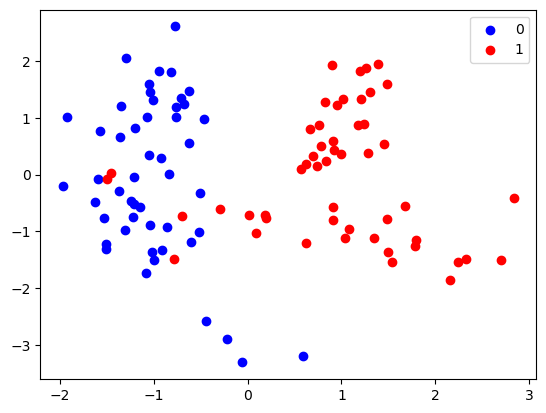

In [58]:
# Visualize the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
plt.show()

### **Sigmoid Function**
Sigmoid funtion is to convert the ouput of a linear regression model to value between 0 and 1. It is used to convert the output of a linear regression model to a probability distribution over the classes.
$$
sigmoid(x) = \frac{1}{1 + e^{-x}}
$$

In [59]:
# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### **Cross Entropy Loss:**
$$
Loss(y, \hat{y}) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]
$$

In [60]:
# Define the loss function
def loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [ ]:
# y = w1x1 + w2x2 + b

In [61]:
# Initialize the weights and bias
w = np.zeros(X.shape[1])
b = 0
w

array([0., 0.])

### **Gradient Descent of Logistics Regression**

For $w$：

$$
\frac{\partial Loss}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i) x_i
$$

For $b$：

$$
\frac{\partial Loss}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (\hat{y_i} - y_i)
$$

If you are not familiar with mathematics, you can skip this part.

In [62]:
# Define the gradient descent function
def gradient_descent(X, y, w, b, learning_rate):
    n = len(y)
    y_pred = sigmoid(np.dot(X, w) + b)
    dw = (1 / n) * np.dot(X.T, (y_pred - y))
    db = (1 / n) * np.sum(y_pred - y)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

In [66]:
# Update the weights and bias
w, b = gradient_descent(X, y, w, b, 0.001)

# Run the gradient descent algorithm in n iterations
def method1(X, y, w, b, learning_rate, iterations):
    for i in range(iterations):
        w, b = gradient_descent(X, y, w, b, learning_rate)
    return w, b

# Run the gradient descent algorithm until the loss is less than a certain value
def method2(X, y, w, b, learning_rate, epsilon=1):
    while True:
        w, b = gradient_descent(X, y, w, b, learning_rate)
        y_pred = sigmoid(np.dot(X, w) + b)
        loss_value = loss(y, y_pred)
        if loss_value < epsilon:
            break
    return w, b

In [64]:
# Fit the model with method1
w, b = method1(X, y, w, b, 0.001, 1000)

# Make predictions
y_pred = sigmoid(np.dot(X, w) + b)

# Get the accuracy
accuracy = np.mean(y == (y_pred > 0.5))
print('Accuracy:',accuracy)
print('loss:',loss(y, y_pred))

Accuracy: 0.94
loss: 0.5214000804234854


In [67]:
w = np.zeros(X.shape[1])
b = 0

# Fit the model with method2
w, b = method2(X, y, w, b, 0.001)

# Make predictions
y_pred = sigmoid(np.dot(X, w) + b)

# Get the accuracy
accuracy = np.mean(y == (y_pred > 0.5))
print('Accuracy:',accuracy)
print('loss:',loss(y, y_pred))

Accuracy: 0.94
loss: 0.6929079077101309
